## IMDB-Reviews-Reaction-Tags-Predictor




In [ ]:
# Environment
import tarfile
import os
import random


### Phase One -- Manual Labelling
The following part of the code will download the dataset and process it into random csv file contains 50 mixed positive and negative comments.
### Emotion Labels


*   Happiness: Overall very enjoy the movie
*   Sadness: The movie makes people sorrow
*   Fear:
*   Surprise
*   Emotional_Damage



```
# This is formatted as code
```



#### Star Reating
1-5

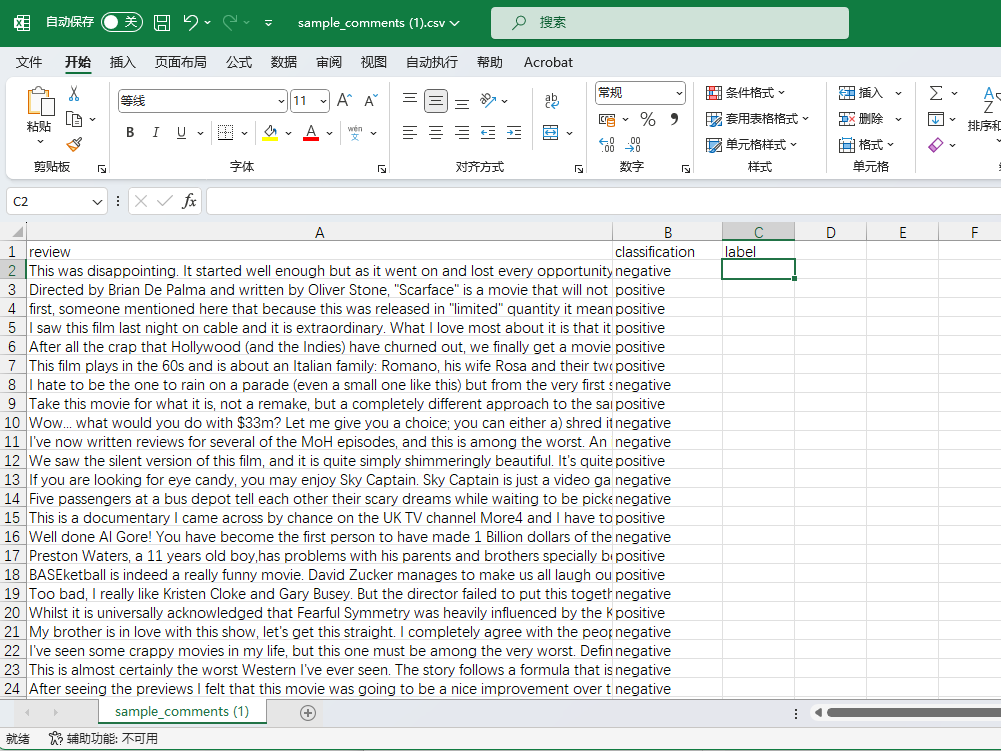

In [ ]:
# Parpare for the Data
# Download the data from stanford.edu
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -O /content/aclImdb_v1.tar.gz

--2023-11-05 23:14:41--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘/content/aclImdb_v1.tar.gz’

/content/aclImdb_v1 100%[===================>]  80.23M  7.59MB/s    in 11s     

2023-11-05 23:14:52 (7.28 MB/s) - ‘/content/aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [ ]:
# Extract the Dataset
with tarfile.open('/content/aclImdb_v1.tar.gz', "r:gz") as tar:
    tar.extractall(path='/content/')



In [ ]:
# Define the path
aclimdb_path = os.path.join('/content/', 'aclImdb')
os.listdir(aclimdb_path)
# Define the Train path
train_path = os.path.join(aclimdb_path, 'train')
os.listdir(train_path)

['unsupBow.feat',
 'urls_neg.txt',
 'unsup',
 'labeledBow.feat',
 'urls_pos.txt',
 'pos',
 'neg',
 'urls_unsup.txt']

In [ ]:
# Function to read a random file from a directory
def read_random_files(directory, num_files=2):
    files = os.listdir(directory)
    sample_files = random.sample(files, num_files)
    texts = []
    for file in sample_files:
        file_path = os.path.join(directory, file)
        with open(file_path, 'r', encoding='utf-8') as f:
            texts.append(f.read())
    return texts

# Read random files from both 'neg' and 'pos' directories
neg_reviews = read_random_files(os.path.join(train_path, 'neg'), num_files=2)
pos_reviews = read_random_files(os.path.join(train_path, 'pos'), num_files=2)

neg_reviews, pos_reviews

(["Don't even waste your time, let alone pay rental for this piece of dreck! How it got made is beyond me. (I don't know why there's a minimum of 10 lines... I've already summarized this trashy movie, but, oh well...) The acting was awful, like they all needed lessons. The plot was weak, the ending... Feh! I think the cinematography was the only thing that didn't totally suck... well, maybe the sound was minimalistically OK. The one good thing is, if they could make this movie, even make some money with it, there may be hope for any screenwriter with a REAL idea. So, you-all take heart! I guess the same holds true of actors... if these people actually got paid, then you can, too!",
  'I borrowed this movie because not only because its gay theme but the thought of role playing really intrigued me. I was pleasantly surprised that it was shot in San Francisco since I live near SF. And of course it was nice to see shots of the Castro district (although the castro to me really caters more t

### CSV Path
The sample CSV will be exported to the following location:

```
/content/sample_comments.csv
```
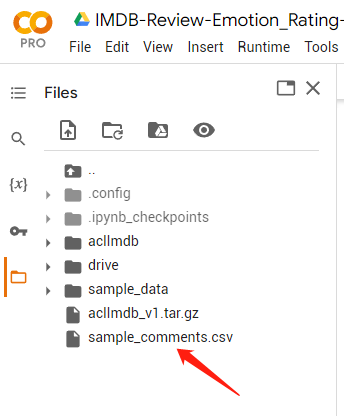



In [ ]:
import pandas as pd
# Prepare for the Random Generated file (50 per each) for manually labeling process
numofsamples = 50

# Function to create dataframe for the sample comments
def create_sample_dataframe(directory, classification, numofsamples):
    files = os.listdir(directory)
    sample_files = random.sample(files, numofsamples)
    data = []
    for file in sample_files:
        file_path = os.path.join(directory, file)
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read()
            data.append({'review': text, 'classification': classification})
    return pd.DataFrame(data)
# Create Data Frame for negative and postive comments
negative = create_sample_dataframe(os.path.join(train_path, 'neg'), 'negative', numofsamples)
positive = create_sample_dataframe(os.path.join(train_path, 'pos'), 'positive', numofsamples)

# Combine the Dataframe
sample_reviews_df = pd.concat([negative, positive], ignore_index=True)

# Mix the negative and postive comments
sample_reviews_df = sample_reviews_df.sample(frac=1).reset_index(drop=True)

# Save it to csv file for labeling
sample_path = '/content/sample_comments.csv'
sample_reviews_df.to_csv(sample_path, index=False)

### Part 2